In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime as dt

In [11]:
data_mid = pd.read_excel('2022_05_25_SP_2_Monitoring_excel.xlsx', parse_dates=[0], header=None)
data_mid.replace('Overrange', np.nan, inplace =True)
data_mid.replace('Underrange', np.nan, inplace =True)
data_mid.rename(columns={0:'Date_Time', 1:'External Voltage' ,2:'E14_E9_raw', 3:'E12_E9_raw',4:'E2_E9_raw',
                     5:'E14_E9_filter', 6:'E12_E9_filter',7:'E2_E9_filter',8:'Temperatur'}
            ,inplace=True)


data_old = pd.read_excel('2022_05_25_SP_Monitoring_excel.xlsx', parse_dates=[0], 
                         header=None)
data_old.replace('Overrange', np.nan, inplace =True)
data_old.replace('Underrange', np.nan, inplace =True)
data_old.rename(columns={0:'Date_Time', 1:'External Voltage' ,2:'E14_E9_raw', 3:'E12_E9_raw',4:'E2_E9_raw',
                     5:'E14_E9_filter', 6:'E12_E9_filter',7:'E2_E9_filter',8:'Temperatur'}
            ,inplace=True)

data_new = pd.read_excel('2022_05_26_SP_Monitoring_excel.xlsx', parse_dates=[0], 
                         header=None)
data_new.replace('Overrange', np.nan, inplace =True)
data_new.replace('Underrange', np.nan, inplace =True)
data_new.rename(columns={0:'Date_Time', 1:'External Voltage' ,2:'E14_E9_raw', 3:'E12_E9_raw',4:'E2_E9_raw',
                     5:'E14_E9_filter', 6:'E12_E9_filter',7:'E2_E9_filter',8:'Temperatur'}
            ,inplace=True)

data_new_1 = pd.read_excel('2022_06_15_SP_Monitoring_excel.xlsx', parse_dates=[0], 
                         header=None)
data_new_1.replace('Overrange', np.nan, inplace =True)
data_new_1.replace('Underrange', np.nan, inplace =True)
data_new_1.rename(columns={0:'Date_Time', 1:'External Voltage' ,2:'E14_E9_raw', 3:'E12_E9_raw',4:'E2_E9_raw',
                     5:'Temperatur'},inplace=True)

data = pd.concat([data_old, data_mid])
#data = pd.concat([data_old, data_mid, data_new, data_new_1], sort=False)
#data = pd.concat([data_old, data_mid, data_new_1], sort=False)

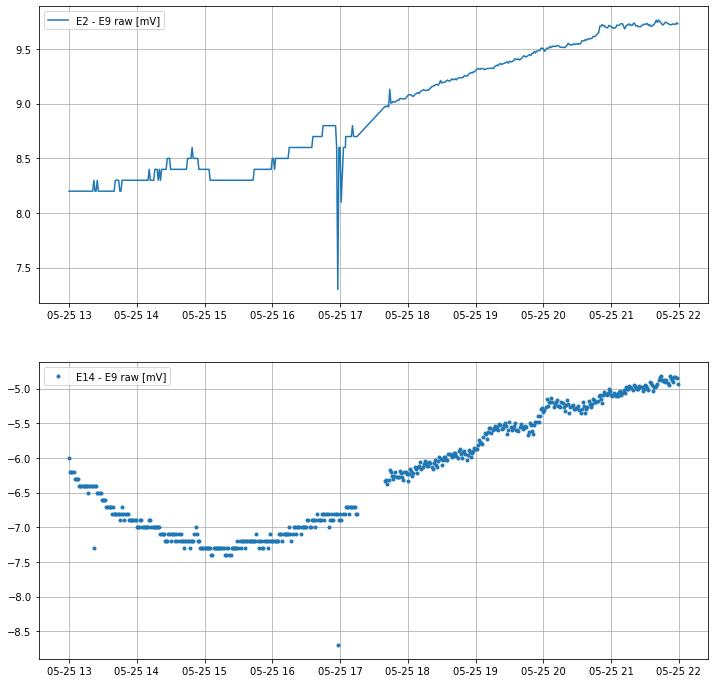

In [12]:
fig, axes = plt.subplots(2, figsize=(12,12))

ax = axes[0]
plot_data = data[(data['Date_Time'] > dt.datetime(2022,5,25,13)) & 
                 (data['Date_Time'] < dt.datetime(2022,5,25,22))]
#ax.plot(plot_data['Date_Time'], plot_data['E11_E9_raw'], label='E11 - E9 raw [mV]')
ax.plot(plot_data['Date_Time'], plot_data['E2_E9_raw'], label='E2 - E9 raw [mV]')
#ax.plot(plot_data['Date_Time'], plot_data['E4_E9_raw'], label='E4 - E9 raw [mV]')
ax.legend()
ax.grid()


ax = axes[1]
#ax.plot(plot_data['Date_Time'], plot_data['E11_E9_filter'], label='E11 - E9 filter [mV]')
ax.plot(plot_data['Date_Time'], plot_data['E12_E9_raw'], '.', label='E14 - E9 raw [mV]')
#ax.plot(plot_data['Date_Time'], plot_data['E4_E9_filter'], label='E4 - E9 filter [mV]')
ax.legend()
ax.grid()

In [13]:
data['E12_E9_roll'] = data['E12_E9_raw'].rolling(5).mean()
data['E14_E9_roll'] = data['E14_E9_raw'].rolling(5).mean()
data['E2_E9_roll'] = data['E2_E9_raw'].rolling(5).mean()
data['Temperatur_roll'] = data['Temperatur'].rolling(5).mean()

path = "..\..\Tides"

top_row = 26
bottom_row = 53970 

tides_data = pd.read_csv(path+'\Spiekeroog_Gezeiten_2022.txt', header=None, skiprows=top_row,nrows= (bottom_row - top_row),
            sep='#', parse_dates=[5,6])

tides_data[5] = tides_data[5].str.replace(' ','')
tides_data['Date'] = pd.to_datetime(tides_data[5] + ' '  + tides_data[6])

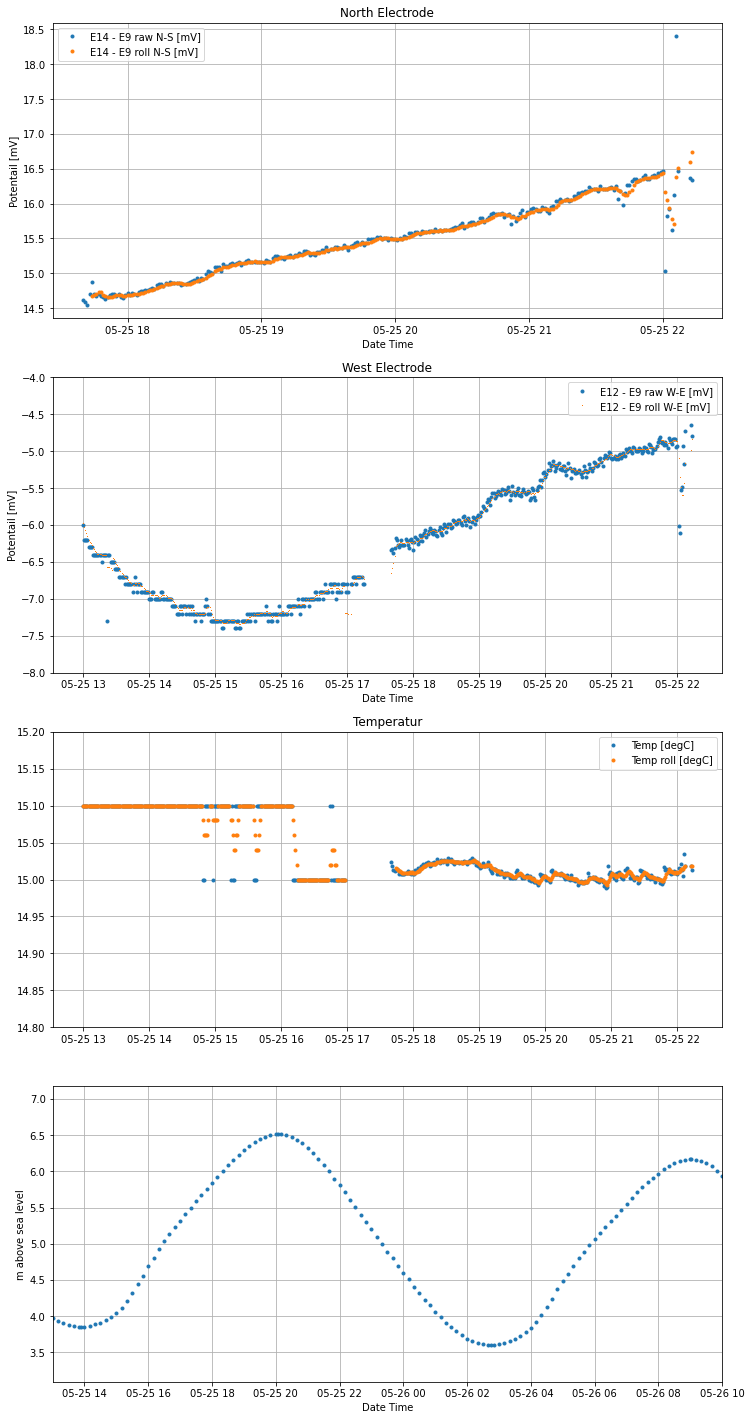

In [16]:
fig, axes  = plt.subplots(4, figsize=(12,25))

ax = axes[0]
#plot_data = data[(data['Date_Time'] > dt.datetime(2022,5,25,13)) & 
#                 (data['Date_Time'] < dt.datetime(2022,5,25,21,30))]
plot_data = data[data['Date_Time'] > dt.datetime(2022,5,25,13)]
ax.plot(plot_data['Date_Time'], plot_data['E14_E9_raw'], '.',label='E14 - E9 raw N-S [mV]')
ax.plot(plot_data['Date_Time'], plot_data['E14_E9_roll'], ".", label='E14 - E9 roll N-S [mV]')
#ax.plot(plot_data['Date_Time'], plot_data['E4_E9_raw'], label='E4 - E9 raw [mV]')
#ax.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,26,10))
#ax.set_ylim(14.5,50)
ax.set_ylabel("Potentail [mV]")
ax.set_xlabel("Date Time")
ax.set_title("North Electrode")
ax.legend()
ax.grid()

ax = axes[1]
#plot_data = data[data['Date_Time'] > dt.datetime(2022,5,25,13)]
ax.plot(plot_data['Date_Time'], plot_data['E12_E9_raw'], ".", label='E12 - E9 raw W-E [mV]')
ax.plot(plot_data['Date_Time'], plot_data['E12_E9_roll'], ",", label='E12 - E9 roll W-E [mV]')
#ax.plot(plot_data['Date_Time'], plot_data['E4_E9_raw'], label='E4 - E9 raw [mV]')
#ax.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,26,10))
ax.set_ylim(-8, -4)
ax.set_ylabel("Potentail [mV]")
ax.set_xlabel("Date Time")
ax.set_title("West Electrode")
ax.legend()
ax.grid()

ax = axes[2]
plot_data = data[data['Date_Time'] > dt.datetime(2022,5,25,13)]
ax.plot(plot_data['Date_Time'], plot_data['Temperatur'], ".", label='Temp [degC]')
ax.plot(plot_data['Date_Time'], plot_data['Temperatur_roll'], ".",  label='Temp roll [degC]')
ax.set_ylim(14.8,15.2)
#ax.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,26,10))
ax.set_title('Temperatur')
ax.legend()
ax.grid()


ax = axes[3]
ax.plot(tides_data['Date'], tides_data.iloc[:,7], '.')
ax.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,26,10))
ax.set_xlabel('Date Time')
ax.set_ylabel('m above sea level')
ax.grid()

fig.savefig('All_data.pdf')

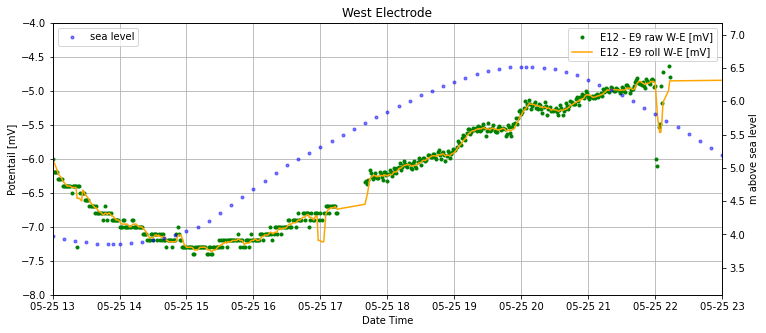

In [10]:
fig , ax = plt.subplots(1, figsize=(12,5))

#plot_data = data[data['Date_Time'] > dt.datetime(2022,5,25,13)]
ax.plot(plot_data['Date_Time'], plot_data['E12_E9_raw'], ".", color='green', label='E12 - E9 raw W-E [mV]')
ax.plot(plot_data['Date_Time'], plot_data['E12_E9_roll'], color= 'orange',label='E12 - E9 roll W-E [mV]')
#ax.plot(plot_data['Date_Time'], plot_data['E4_E9_raw'], label='E4 - E9 raw [mV]')
ax.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,25,23))
ax.set_ylim(-8, -4)
ax.set_ylabel("Potentail [mV]")
ax.set_xlabel("Date Time")
ax.set_title("West Electrode")
ax.legend()
ax.grid()

ax2 = ax.twinx()
ax2.plot(tides_data['Date'], tides_data.iloc[:,7], '.',color='blue', alpha=0.5 , label = 'sea level')
ax2.set_xlim(dt.datetime(2022,5,25,13),dt.datetime(2022,5,25,23))
ax2.set_xlabel('Date Time')
ax2.set_ylabel('m above sea level')
ax2.legend(loc='upper left')


#fig.savefig('Memo_data.pdf')